In [9]:
import numpy as np # algèbre linéaire
import pandas as pd # procès de données, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# librairie word cloud
from wordcloud import WordCloud

# librairie matplotlib
import matplotlib.pyplot as plt

# Permet d'afficher les données disponibles dans le répertoire data
import os
print(os.listdir(".")) 


['graph.png', 'université.ipynb', 'brief_dashc.py', '.ipynb_checkpoints', 'timesData.csv', 'Tutorial_plotly_DataDev_Simplon_L2.ipynb', 'université_dash_l']


In [10]:
# Chargement des données qui seront utilisées.
timesData = pd.read_csv("timesData.csv")

In [19]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2594 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2385 non-null   float64
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memor

In [20]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,NaN,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,NaN,89.5,"11,751",4.4,20%,50 : 50,2011


### Exercices

<font color='blue'>
    
1. Quels sont les pays dans lesquels le score universitaire pour le transfert de connaissances se démarque ? Utiliser un ou plusieurs graphique pour justifier votre réponse.
    
2. Existe-t-il une corrélation entre le score universitaire pour le transfert de connaissances et le score universitaire des perspectives internationales (personnel, étudiants, recherche) ? Utiliser un ou plusieurs graphique pour justifier votre réponse.

3. Proposer un cas d'étude qui justifie un diagramme de dispersion 3D (en utilisant ce même jeux de données).

<font color='black'>

**Vous pouvez si vous le désirez travailler par groupe de 2 ou 3 personnes.**  


1-Quels sont les pays dans lesquels le score universitaire pour le transfert de connaissances se démarque ? 
Utiliser un ou plusieurs graphique pour justifier votre réponse.

In [11]:
#graph avec corrélation country et income

country = list(timesData.country.unique())
country.sort()
print(country)

['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macau', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Poland', 'Portugal', 'Qatar', 'Republic of Ireland', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Uganda', 'Ukraine', 'Unisted States of America', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Unted Kingdom']


In [12]:
#remplacement des données avec fautes
timesData.replace('Unisted States of America','United States of America')
timesData.replace('Unted Kingdom','United Kingdom')

country = list(timesData.country.unique())
country.sort()
print(country)

['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macau', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Poland', 'Portugal', 'Qatar', 'Republic of Ireland', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Uganda', 'Ukraine', 'Unisted States of America', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Unted Kingdom']


Text(0, 0.5, 'moyenne du income par pays')

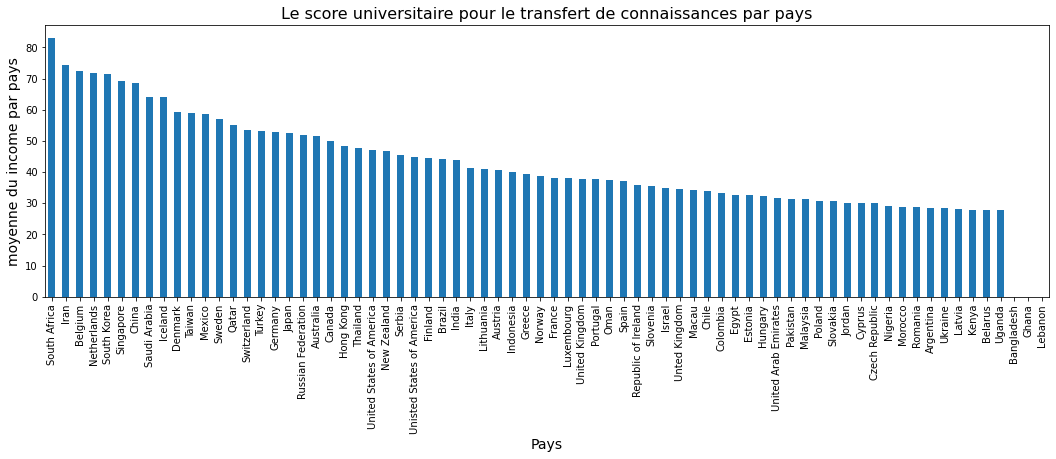

In [13]:
dfValue = timesData
dfValue.income = pd.to_numeric(dfValue.income, errors='coerce')


ax = dfValue.groupby(['country']).income.mean().sort_values(ascending=False).plot(kind='bar', figsize = (18,5))
ax.set_xlabel('Pays', fontsize=14)
ax.set_title("Le score universitaire pour le transfert de connaissance par pays",fontsize=16)
ax.set_ylabel("moyenne du income par pays", fontsize=14)

2-Existe-t-il une corrélation entre le score universitaire pour le transfert de connaissances et le score universitaire des perspectives internationales (personnel, étudiants, recherche) ? Utiliser un ou plusieurs graphique pour justifier votre réponse.

In [18]:
import plotly.graph_objs as go

x = timesData.country


trace1 = {
  'x': x,
  'y': timesData.groupby('country').income.agg(np.mean).sort_values(ascending=False),
    #timesData.income,
  'name': 'transfert de connaissance',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': timesData.groupby('country').international.mean().sort_values(ascending=False),
    #timesData.international,
  'name': 'perpectives internationales',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'pays'},
  'barmode': 'relative',
  'title': 'corrélation entre transfert de connaissance et les perspectives internationales par pays'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [34]:
import plotly.graph_objs as go

x = timesData.university_name


trace1 = {
  'x': x,
  'y': timesData.income.sort_values(ascending=False),
  'name': 'transfert de connaissance',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': timesData.international.sort_values(ascending=False),
    
  'name': 'perpectives internationales',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'pays'},
  'barmode': 'relative',
  
  'title': 'corrélation entre transfert de connaissance et les perspectives internationales par université'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [15]:
# Prépare les trames de données (data frame)
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Création de la trame 1
trace1 = go.Scatter(
                    x = df.university_name,
                    y = df.international,
                    mode = 'markers',
                    name = "perspectives internationales",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = [df.university_name])
# Création de la trame 2
trace2 = go.Scatter(
                    x = df.university_name,
                    y = df.income,
                    mode = 'markers',
                    name = "transfert de connaissance",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = df.university_name)

data = [trace1, trace2]
layout = dict(title = 'perspectives internationales et transfert de connaissance par université',
              xaxis = dict(title = 'universités',ticklen = 5, zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [36]:
#df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

timesData.income = pd.to_numeric(timesData.income, errors='coerce')
timesData.international = pd.to_numeric(timesData.international, errors='coerce')

# Création de la première trace 
trace1 = go.Bar(
                x = timesData.university_name.head(300),
                y = timesData.income.sort_values(ascending=False),
                name = "citations",
                marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                             line = dict(color ='rgb(255, 0, 0)',width =1.5)),
                text = timesData.country)

# Création de la deuxième trace 
trace2 = go.Bar(
                x = timesData.university_name.head(300),
                y = timesData.international.sort_values(ascending=False),
                name = "perspectives internationales",
                marker = dict(color = 'rgba(0, 0, 255, 0.5)',
                              line = dict(color = 'rgb(0, 0, 255)',width = 1.5)),
                text = timesData.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

3-Proposer un cas d'étude qui justifie un diagramme de dispersion 3D (en utilisant ce même jeux de données) ?

Cela nous permet de mettre en corrélation la total score, la recherche et les citations par exemple.

In [17]:
x = timesData['total_score']
y = timesData['research']
z= timesData['income']

trace1 = go.Scatter3d(  #go.Scatter3d : créer un nuage de points 3D
    x=x, #x, y, z : axe des tracés
    y=y,
    z=z,
    mode='markers',#mode : marché dispersé
    marker=dict(
    size=5, #size : taille du marqueur
    color=z, #color : axe de l'échelle des couleurs
    colorscale='viridis', #colorscale (échelle de couleurs) : 4ème dimension
    opacity=0.9))

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig,"3d-plot")
    